In [178]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

In [179]:
path="C:/Users/AI_DEV/Downloads/archive (4)/dataset"

In [180]:
def display_images(images, labels, num_images=5, title_prefix=""):
    plt.figure(figsize=(10, 2 * num_images))
    for i in range(num_images):
        ind=random.randint(0,len(images))
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[ind], cmap='gray')
        plt.title(f"{title_prefix}{labels[ind]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [181]:
def load_images_and_labels(base_path):
    X = []
    y = []
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith('.png'):
                path = os.path.join(root, file)
                image = Image.open(path).resize((28,28)).convert('L')
                image = np.array(image)
                X.append(image)
                label = os.path.basename(root)
                y.append(label)
    return np.array(X),np.array(y)
base_path =path
X, y = load_images_and_labels(base_path)

In [182]:
X.shape,y.shape

((210227, 28, 28), (210227,))

In [183]:
print(np.unique(y))
print(len(np.unique(y)))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A_U' 'B_U' 'C_U' 'D_U' 'E_U'
 'F_U' 'G_U' 'H_U' 'I_U' 'J_U' 'K_U' 'L_U' 'M_U' 'N_U' 'O_U' 'P_U' 'Q_U'
 'R_U' 'S_U' 'T_U' 'U_U' 'V_U' 'W_U' 'X_U' 'Y_U' 'Z_U' 'a_L' 'b_L' 'c_L'
 'd_L' 'e_L' 'f_L' 'g_L' 'h_L' 'i_L' 'j_L' 'k_L' 'l_L' 'm_L' 'n_L' 'o_L'
 'p_L' 'q_L' 'r_L' 's_L' 't_L' 'u_L' 'v_L' 'w_L' 'x_L' 'y_L' 'z_L']
62


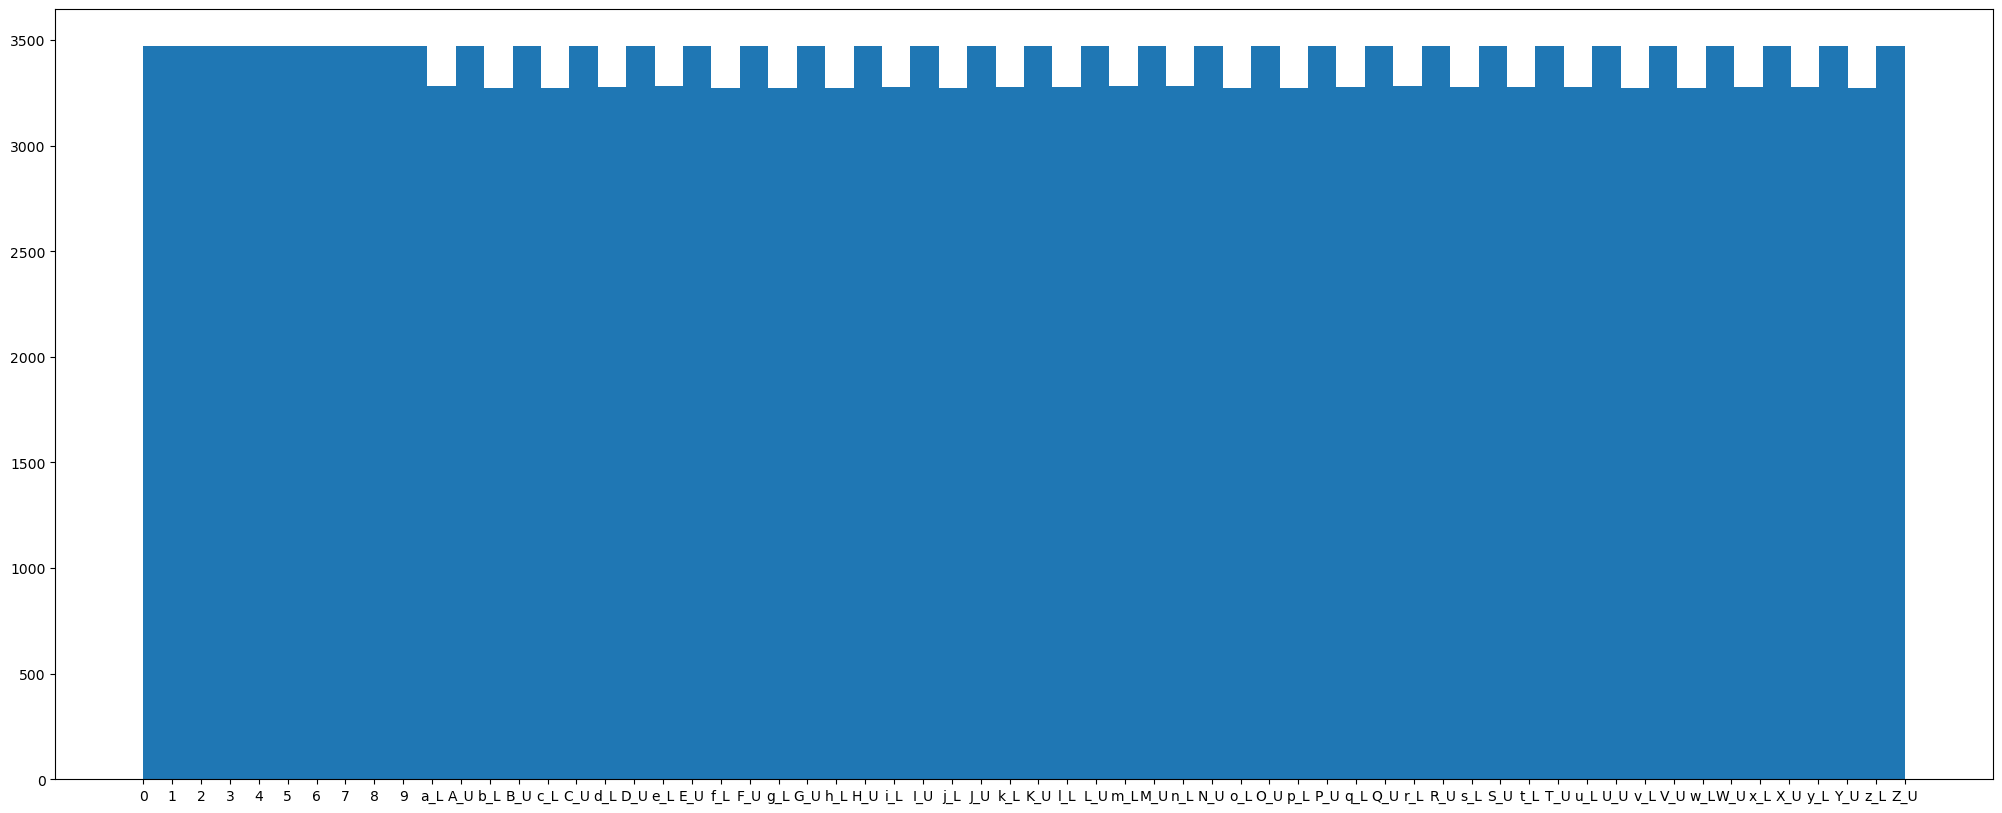

In [184]:
plt.figure(figsize=(25, 10))
plt.hist(y,bins=62)
plt.show()

In [185]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

In [186]:
def binarize(image):
    binary_image = cv2.adaptiveThreshold(image.astype('uint8'), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY_INV, 11, 2)
    return binary_image

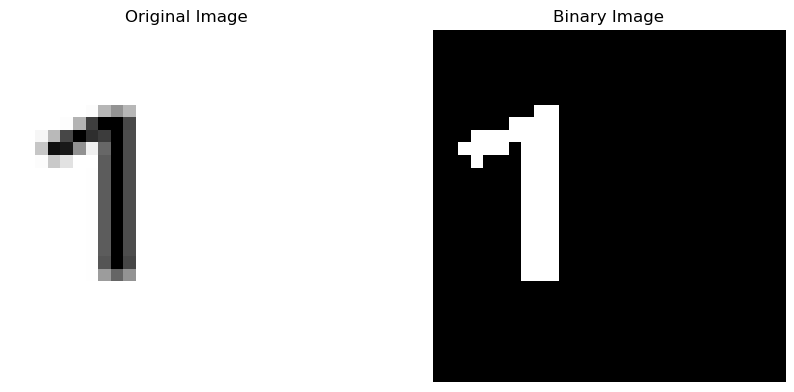

In [187]:
img=X[5000]
binary_image=binarize(X[5000])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].title.set_text('Original Image')
ax[0].axis('off')
ax[1].imshow(binary_image, cmap='gray')
ax[1].title.set_text('Binary Image')
ax[1].axis('off')
plt.show()


In [188]:
binary_images = np.array(list(map(binarize, X)))

In [189]:
ind_class={i:le.classes_[i] for i in range(len(le.classes_))}
print(ind_class)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A_U', 11: 'B_U', 12: 'C_U', 13: 'D_U', 14: 'E_U', 15: 'F_U', 16: 'G_U', 17: 'H_U', 18: 'I_U', 19: 'J_U', 20: 'K_U', 21: 'L_U', 22: 'M_U', 23: 'N_U', 24: 'O_U', 25: 'P_U', 26: 'Q_U', 27: 'R_U', 28: 'S_U', 29: 'T_U', 30: 'U_U', 31: 'V_U', 32: 'W_U', 33: 'X_U', 34: 'Y_U', 35: 'Z_U', 36: 'a_L', 37: 'b_L', 38: 'c_L', 39: 'd_L', 40: 'e_L', 41: 'f_L', 42: 'g_L', 43: 'h_L', 44: 'i_L', 45: 'j_L', 46: 'k_L', 47: 'l_L', 48: 'm_L', 49: 'n_L', 50: 'o_L', 51: 'p_L', 52: 'q_L', 53: 'r_L', 54: 's_L', 55: 't_L', 56: 'u_L', 57: 'v_L', 58: 'w_L', 59: 'x_L', 60: 'y_L', 61: 'z_L'}


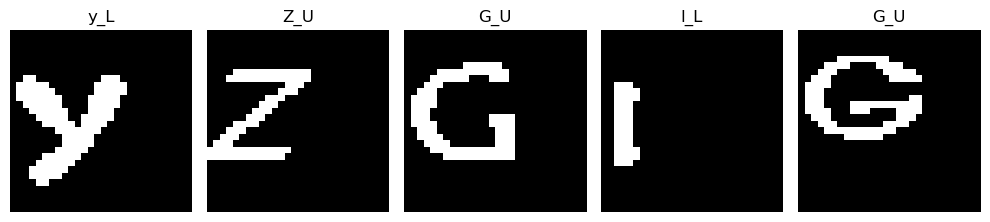

In [190]:
display_images(binary_images, [ind_class[i] for i in y], num_images=5, title_prefix="")

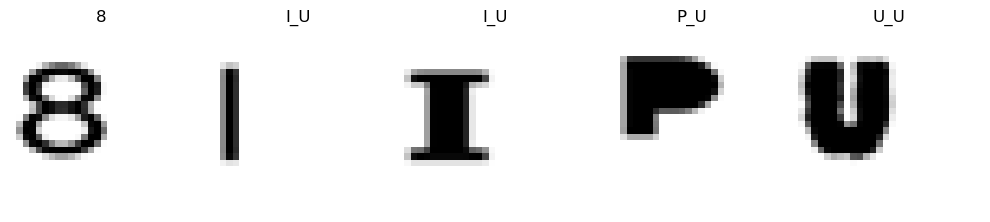

In [191]:
display_images(X, [ind_class[i] for i in y], num_images=5, title_prefix="")

In [192]:
def noise_remove(image):
    kernel = np.ones((1,1), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)
    return dilated_image
binary_wo_noise=np.array(list(map(noise_remove, binary_images)))

In [193]:
norm_binary_wo_noise=binary_wo_noise//255
norm_binary_wo_noise

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

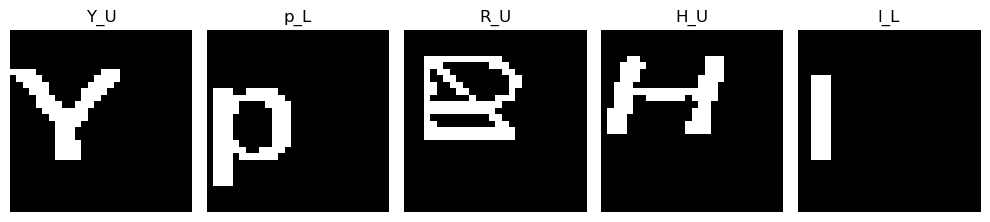

In [194]:
display_images(norm_binary_wo_noise, [ind_class[i] for i in y], num_images=5, title_prefix="")

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
ohe_y=ohe.fit_transform(y.reshape(-1,1))
X_train,X_test,y_train,y_test=train_test_split(norm_binary_wo_noise,ohe_y,test_size=0.2,random_state=69)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((168181, 28, 28), (42046, 28, 28), (168181, 62), (42046, 62))

In [196]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(62, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_3 (Avera  (None, 13, 13, 32)        0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_6 (Bat  (None, 13, 13, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                      

In [197]:
from tensorflow.keras.models import Model
layer_outputs = [model.layers[0].output,
                 model.layers[1].output]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [198]:
def display_images_and_activations(original_img, activations, layer_names):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    axes[0].imshow(original_img[0, :, :, 0], cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    axes[1].imshow(activations[0][0, :, :, 0], cmap='gray')
    axes[1].set_title(f"Post-{layer_names[0]}")
    axes[1].axis('off')
    
    axes[2].imshow(activations[1][0, :, :, 0], cmap='gray')
    axes[2].set_title(f"Post-{layer_names[1]}")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 30ms/step


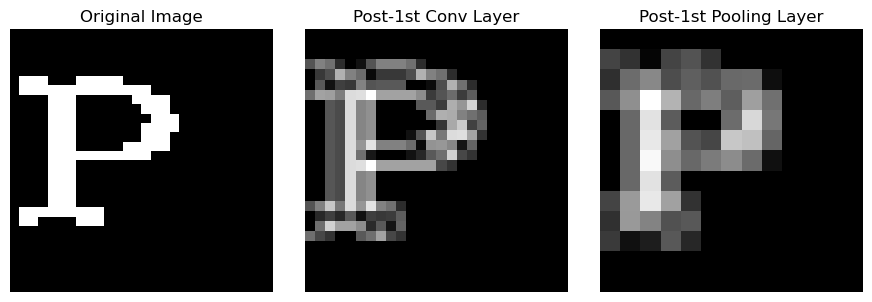

In [199]:
test_image = X_train[17].reshape(1, 28, 28, 1)
activations = activation_model.predict(test_image)
layer_names = ["1st Conv Layer", "1st Pooling Layer"]
display_images_and_activations(test_image, activations, layer_names)


In [206]:
def display_large(original_img, activations, num_features=32):
    num_cols = 6
    num_rows = num_cols

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(original_img[0, :, :, 0], cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    def create_feature_map_grid(activations, feature_map_size):
        grid = np.zeros((num_rows * feature_map_size, num_cols * feature_map_size))
        for i in range(num_features):
            row = i // num_cols
            col = i % num_cols
            feature_map = activations[0, :, :, i]
            grid[row * feature_map_size:(row + 1) * feature_map_size,
                 col * feature_map_size:(col + 1) * feature_map_size] = feature_map
        return grid

    feature_map_size = activations[0].shape[1]
    feature_map_grid_1 = create_feature_map_grid(activations[0], feature_map_size)
    axes[1].imshow(feature_map_grid_1, cmap='gray')
    axes[1].set_title("Feature Maps After Conv Layer")
    axes[1].axis('off')

    feature_map_size = activations[1].shape[1]
    feature_map_grid_2 = create_feature_map_grid(activations[1], feature_map_size)
    axes[2].imshow(feature_map_grid_2, cmap='gray')
    axes[2].set_title("Feature Maps After Pooling Layer")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 11ms/step


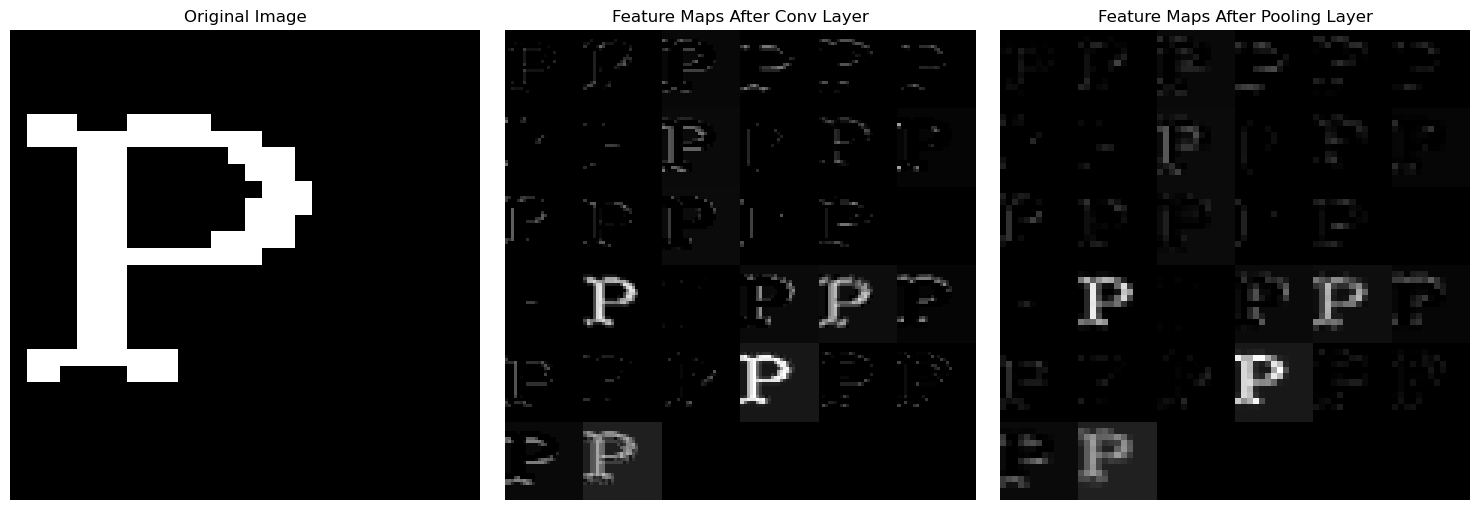

In [207]:
test_image = X_train[17].reshape(1, 28, 28, 1)
activations = activation_model.predict(test_image)
display_large(test_image, activations)

In [202]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=6)

Epoch 1/6
5256/5256 [==============================] - 22s 4ms/step - loss: 0.9476 - accuracy: 0.7498 - val_loss: 0.4642 - val_accuracy: 0.8666
Epoch 2/6
5256/5256 [==============================] - 21s 4ms/step - loss: 0.5423 - accuracy: 0.8483 - val_loss: 0.3909 - val_accuracy: 0.8843
Epoch 3/6
5256/5256 [==============================] - 21s 4ms/step - loss: 0.4689 - accuracy: 0.8674 - val_loss: 0.3675 - val_accuracy: 0.8932
Epoch 4/6
5256/5256 [==============================] - 21s 4ms/step - loss: 0.4229 - accuracy: 0.8784 - val_loss: 0.3417 - val_accuracy: 0.9014
Epoch 5/6
5256/5256 [==============================] - 21s 4ms/step - loss: 0.3908 - accuracy: 0.8860 - val_loss: 0.3375 - val_accuracy: 0.9015
Epoch 6/6
5256/5256 [==============================] - 21s 4ms/step - loss: 0.3670 - accuracy: 0.8923 - val_loss: 0.3235 - val_accuracy: 0.9047


$$Loss = -\sum_{i} y_i \log(p(y_i | x))$$


$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$


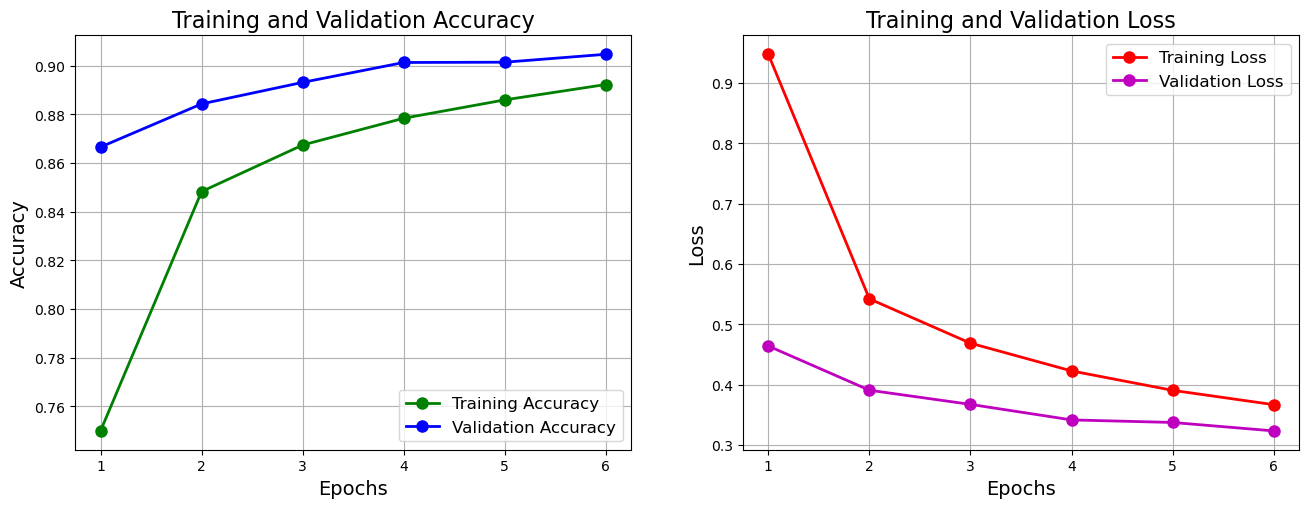

In [203]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'g-o', label='Training Accuracy', linewidth=2, markersize=8)
plt.plot(epochs, val_acc, 'b-o', label='Validation Accuracy', linewidth=2, markersize=8)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-o', label='Training Loss', linewidth=2, markersize=8)
plt.plot(epochs, val_loss, 'm-o', label='Validation Loss', linewidth=2, markersize=8)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout(pad=4.0)
plt.show()


In [204]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
accuracy

1314/1314 [==============================] - 2s 1ms/step


0.9047471816581839

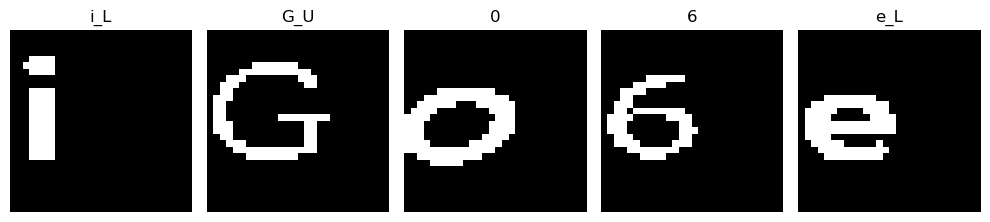

In [209]:
display_images(X_test, [ind_class[i] for i in y_pred_classes], num_images=5, title_prefix="")